In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

## 1. Combining DataFrames

In [2]:
cust_data = pd.DataFrame({"customerID":['101','102','103','104'],
                        'category': ['Medium','Medium','High','Low'],
                        'first_visit': ['yes','no','yes','yes'],
                        'sales': [123,52,214,663]},index=[0,1,2,3])

cust_data_new = pd.DataFrame({"customerID":['101','103','104','105'],
                    'distance': [12,9,44,21],
                    'sales': [123,214,663,331]},index=[4,5,6,7])

In [3]:
cust_data

,customerID,category,first_visit,sales
0,101,Medium,yes,123
1,102,Medium,no,52
2,103,High,yes,214
3,104,Low,yes,663


In [4]:
cust_data_new

,customerID,distance,sales
4,101,12,123
5,103,9,214
6,104,44,663
7,105,21,331


In [5]:
pd.concat([cust_data,cust_data_new],axis=0) # concatenate by row i.e axis=0

,customerID,category,first_visit,sales,distance
0,101,Medium,yes,123,NaN
1,102,Medium,no,52,NaN
2,103,High,yes,214,NaN
3,104,Low,yes,663,NaN
4,101,NaN,NaN,123,12.0
5,103,NaN,NaN,214,9.0
6,104,NaN,NaN,663,44.0
7,105,NaN,NaN,331,21.0


In [6]:
pd.concat([cust_data,cust_data_new],axis=1) # concatenate by column i.e axis=1

,customerID,category,first_visit,sales,customerID,distance,sales
0,101,Medium,yes,123.0,NaN,NaN,NaN
1,102,Medium,no,52.0,NaN,NaN,NaN
2,103,High,yes,214.0,NaN,NaN,NaN
3,104,Low,yes,663.0,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,101,12.0,123.0
5,NaN,NaN,NaN,NaN,103,9.0,214.0
6,NaN,NaN,NaN,NaN,104,44.0,663.0
7,NaN,NaN,NaN,NaN,105,21.0,331.0


In [7]:
# outer merge is union of on
pd.merge(cust_data,cust_data_new,how='outer',on='customerID')

,customerID,category,first_visit,sales_x,distance,sales_y
0,101,Medium,yes,123.0,12.0,123.0
1,102,Medium,no,52.0,NaN,NaN
2,103,High,yes,214.0,9.0,214.0
3,104,Low,yes,663.0,44.0,663.0
4,105,NaN,NaN,NaN,21.0,331.0


In [8]:
# inner merge is intersection of on
pd.merge(cust_data,cust_data_new,how='inner',on='customerID') 

,customerID,category,first_visit,sales_x,distance,sales_y
0,101,Medium,yes,123,12,123
1,103,High,yes,214,9,214
2,104,Low,yes,663,44,663


In [9]:
data_quar = pd.DataFrame({'Q1': [101,102,103],
                              'Q2': [201,202,203]},
                               index=['I0','I1','I2'])

data_quar_new = pd.DataFrame({'Q3': [301,302,303],
                                  'Q4': [401,402,403]},
                               index=['I0','I2','I3'])

In [10]:
data_quar

,Q1,Q2
I0,101,201
I1,102,202
I2,103,203


In [11]:
data_quar_new

,Q3,Q4
I0,301,401
I2,302,402
I3,303,403


In [12]:
data_quar.join(data_quar_new,how='right') 
# outer, inner, left, and right work the same as merge

,Q1,Q2,Q3,Q4
I0,101.0,201.0,301,401
I2,103.0,203.0,302,402
I3,NaN,NaN,303,403


## 2. Handling DataFrames

In [13]:
data = pd.read_csv('data/airbnb.csv')

In [14]:
data.head()

,neighborhood,room_type,accommodates,bedrooms,number_of_reviews,wifi,cable_tv,washer,kitchen,price
0,2,1,3,1.0,118,1,0,1,1,60.0
1,3,2,2,1.0,6,1,1,1,1,17.0
2,3,1,4,1.0,143,1,1,1,1,90.0
3,6,2,2,1.0,25,1,1,1,0,26.0
4,3,2,2,1.0,197,1,1,0,0,42.0


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21846 entries, 0 to 21845
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   neighborhood       21846 non-null  int64  
 1   room_type          21846 non-null  int64  
 2   accommodates       21846 non-null  int64  
 3   bedrooms           21846 non-null  float64
 4   number_of_reviews  21846 non-null  int64  
 5   wifi               21846 non-null  int64  
 6   cable_tv           21846 non-null  int64  
 7   washer             21846 non-null  int64  
 8   kitchen            21846 non-null  int64  
 9   price              21846 non-null  float64
dtypes: float64(2), int64(8)
memory usage: 1.7 MB


In [16]:
data.isnull().sum()

neighborhood         0
room_type            0
accommodates         0
bedrooms             0
number_of_reviews    0
wifi                 0
cable_tv             0
washer               0
kitchen              0
price                0
dtype: int64

In [17]:
data.room_type.eq(data['bedrooms']).sum()
# .eq(): This is a Pandas method used for element-wise comparison. It compares each element in the "room_type" column with the values provided.
# data['bedrooms']: This refers to the values in the "Team 2" column of the DataFrame

6216

In [18]:
data_stock = pd.read_csv('data/AAPL.csv')
data_stock.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,1980-12-12 00:00:00-05:00,0.099584,0.100017,0.099584,0.099584,469033600,0.0,0.0
1,1980-12-15 00:00:00-05:00,0.094821,0.094821,0.094388,0.094388,175884800,0.0,0.0
2,1980-12-16 00:00:00-05:00,0.087893,0.087893,0.087461,0.087461,105728000,0.0,0.0
3,1980-12-17 00:00:00-05:00,0.089625,0.090058,0.089625,0.089625,86441600,0.0,0.0
4,1980-12-18 00:00:00-05:00,0.092224,0.092657,0.092224,0.092224,73449600,0.0,0.0


In [19]:
print(data_stock['Volume'].min())
print(data_stock['Volume'].max())

0
7421640800


In [20]:
data_stock.dtypes

Date             object
Open            float64
High            float64
Low             float64
Close           float64
Volume            int64
Dividends       float64
Stock Splits    float64
dtype: object

In [21]:
data_stock['Date'] = data_stock['Date'].str.extract(r'(\d+-\d+-\d+)')

In [22]:
data_stock.insert(0, 'MMDD', data_stock['Date'].str.split('-', expand=True)[1]+'-'+data_stock['Date'].str.split('-', expand=True)[2])
data_stock.insert(0, 'YYYY', data_stock['Date'].str.split('-', expand=True)[0])

In [23]:
data_stock.head(3)

,YYYY,MMDD,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,1980,12-12,1980-12-12,0.099584,0.100017,0.099584,0.099584,469033600,0.0,0.0
1,1980,12-15,1980-12-15,0.094821,0.094821,0.094388,0.094388,175884800,0.0,0.0
2,1980,12-16,1980-12-16,0.087893,0.087893,0.087461,0.087461,105728000,0.0,0.0


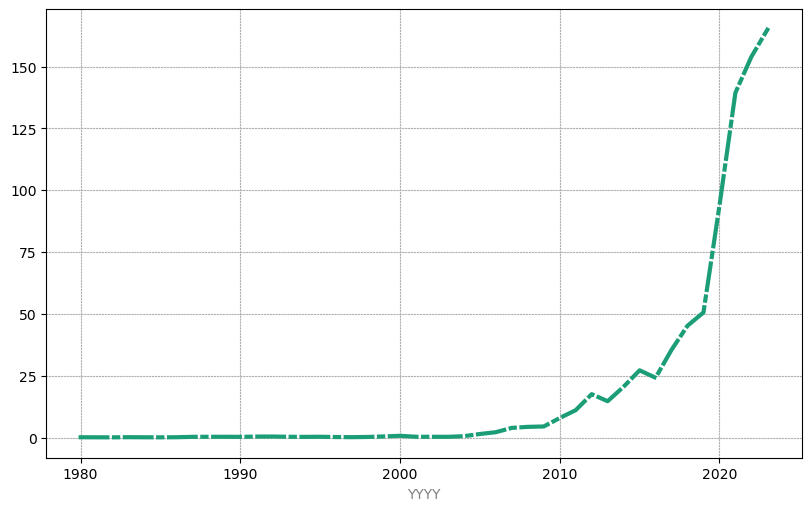

In [24]:
data_stock.groupby(['YYYY'])['Close'].mean().plot();